# Default Detection for American Express 

## Mackenzie Carter, Salvador R Sanchez Castro

### University of San Diego 

### Master of Science, Applied Data Science 

## MADS 502: Data Minning  

 The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories: 
 
$D_*$ = Delinquency variables 

$S_*$ = Spend variables 

$P_*$ = Payment variables 

$B_*$ = Balance variables 

$R_*$ = Risk variables 

with the following features being categorical:  

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 


Note that the negative class has been subsampled for this dataset at 5%, and thus receives a 20x weighting in the scoring metric. 

***

# Explore Data

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import time
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from sklearn.model_selection import train_test_split
import random 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn import metrics

In [2]:
#Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_data = pd.read_csv('Train25.csv')
#train_data = pd.read_csv('train_data.csv')

print("--- %s seconds ---" % (time.time() - start_time))
train_data.head()

--- 32.859943151474 seconds ---


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,1129269,3423938309c0311e273f994fb75c17c051248bec00b142...,2018-02-27,0.692903,0.007248,0.008110,0.813047,0.001296,0.182255,0.008221,...,NaN,NaN,NaN,0.005810,0.007510,0.001479,NaN,0.008584,0.003927,0.000265
2,786878,24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...,2017-10-25,0.760664,0.007164,0.003502,0.816307,0.008692,NaN,0.004170,...,NaN,NaN,NaN,0.004483,0.000421,0.003531,NaN,0.005391,0.001890,0.008278
3,417099,136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...,2017-07-14,0.541180,0.006883,0.592058,0.043188,0.005739,0.140962,0.009141,...,NaN,NaN,NaN,0.001435,0.003579,0.004951,NaN,0.007757,0.002797,0.000894
4,2559303,7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...,2017-11-17,0.368668,0.031484,0.453274,0.027807,0.002330,0.263603,0.002230,...,NaN,NaN,NaN,0.006034,0.007786,0.009002,NaN,0.008526,0.003591,0.007756


In [4]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_labels = pd.read_csv('train_labels.csv')
print("--- %s seconds ---" % (time.time() - start_time))
train_labels.head()

--- 0.3781318664550781 seconds ---


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [5]:
#Merge training data with target class
train_data = pd.merge(train_data, train_labels, on='customer_ID')
train_data.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014,0
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-06-16,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,...,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065,0
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-04-15,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,...,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628,0
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-07-17,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,...,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253,0
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-03-17,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,...,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817,0


In [6]:
#Define y (Target)
y = pd.DataFrame(train_data[['target']])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
#df Shape
train_data.shape

(1382862, 192)

In [8]:
#Data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Columns: 192 entries, Unnamed: 0 to target
dtypes: float64(185), int64(3), object(4)
memory usage: 2.0+ GB


## Work with Non Numerical Data

In [9]:
#function for extracting objects
def getObjectCol(df):
    DType = ['object']
    df = df.select_dtypes(include=DType)
        
    return df

In [10]:
#function for extracting numerical
def getNumericCol(df):
    DType = ['float64','int64']
    df = df.select_dtypes(include=DType)
        
    return df

In [11]:
#Segregate ID Columns
train_data_ID = train_data[['Unnamed: 0','customer_ID']]
train_data_ID.head()

,Unnamed: 0,customer_ID
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...


In [12]:
#Segregate Catagorical
train_data_Cat = train_data[['target','B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
train_data_Cat.head()

,target,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,CO,O,1.0,6.0
1,0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
2,0,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0
3,0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
4,0,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0


In [13]:
#View Data Type
train_data_Cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   target  1382862 non-null  int64  
 1   B_30    1382343 non-null  float64
 2   B_38    1382343 non-null  float64
 3   D_114   1338969 non-null  float64
 4   D_116   1338969 non-null  float64
 5   D_117   1338969 non-null  float64
 6   D_120   1338969 non-null  float64
 7   D_126   1353889 non-null  float64
 8   D_63    1382862 non-null  object 
 9   D_64    1328776 non-null  object 
 10  D_66    155722 non-null   float64
 11  D_68    1328949 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 137.2+ MB


In [14]:
#Convert All columns to catagorical
for col in train_data_Cat.columns:
    train_data_Cat[col] = train_data_Cat[col].astype('category')

In [15]:
#View Data Type after transformation
train_data_Cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   target  1382862 non-null  category
 1   B_30    1382343 non-null  category
 2   B_38    1382343 non-null  category
 3   D_114   1338969 non-null  category
 4   D_116   1338969 non-null  category
 5   D_117   1338969 non-null  category
 6   D_120   1338969 non-null  category
 7   D_126   1353889 non-null  category
 8   D_63    1382862 non-null  category
 9   D_64    1328776 non-null  category
 10  D_66    155722 non-null   category
 11  D_68    1328949 non-null  category
dtypes: category(12)
memory usage: 26.4 MB


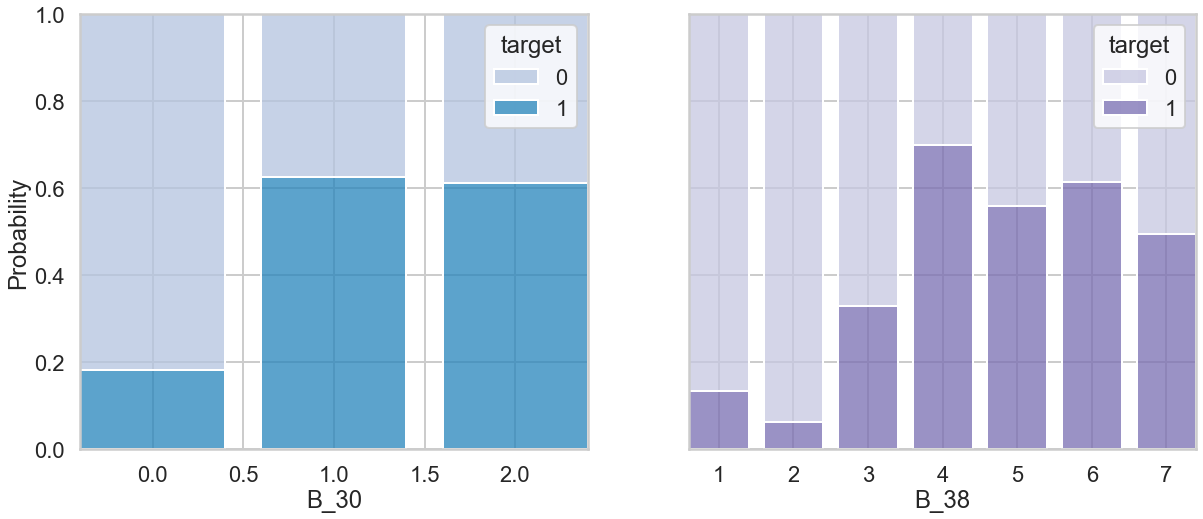

In [16]:
#View data
sns.set_theme(style="whitegrid")
sns.set_context("poster")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8), sharey=True)

sns.histplot(train_data_Cat, x='B_30', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("PuBu"), ax=ax1)
sns.histplot(train_data_Cat, x='B_38', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Purples"), ax=ax2)
plt.show()

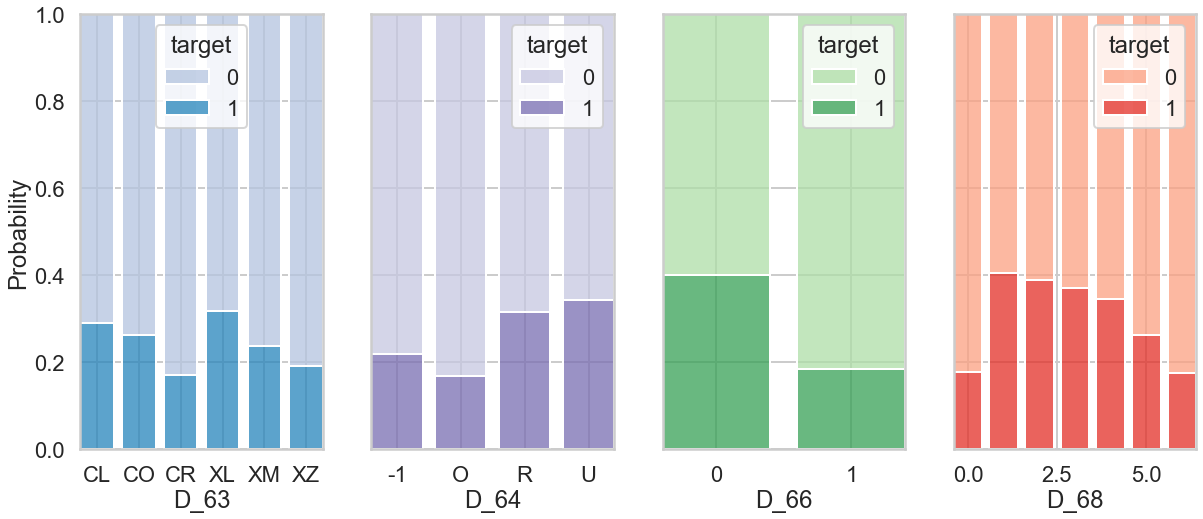

In [17]:
#View data
sns.set_theme(style="whitegrid")
sns.set_context("poster")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,8), sharey=True)

sns.histplot(train_data_Cat, x='D_63', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("PuBu"), ax=ax1)
sns.histplot(train_data_Cat, x='D_64', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Purples"), ax=ax2)
sns.histplot(train_data_Cat, x='D_66', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Greens"), ax=ax3)
sns.histplot(train_data_Cat, x='D_68', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Reds"), ax=ax4)
plt.show()

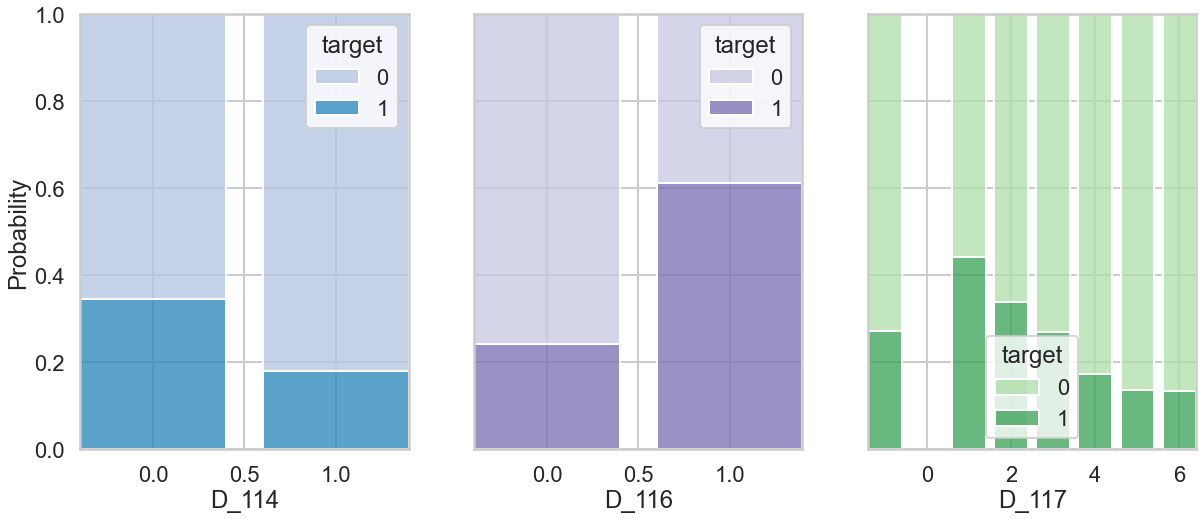

In [18]:
#View data
sns.set_theme(style="whitegrid")
sns.set_context("poster")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8), sharey=True)

sns.histplot(train_data_Cat, x='D_114', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("PuBu"), ax=ax1)
sns.histplot(train_data_Cat, x='D_116', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Purples"), ax=ax2)
sns.histplot(train_data_Cat, x='D_117', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Greens"), ax=ax3)

plt.show()

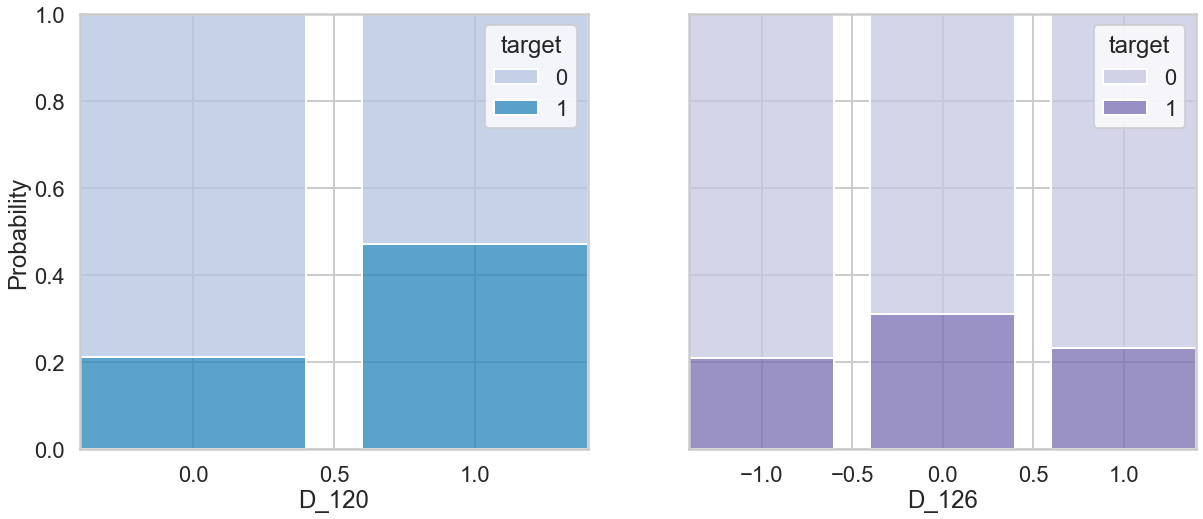

In [19]:
#View data
sns.set_theme(style="whitegrid")
sns.set_context("poster")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8), sharey=True)

sns.histplot(train_data_Cat, x='D_120', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("PuBu"), ax=ax1)
sns.histplot(train_data_Cat, x='D_126', hue="target", stat="probability", multiple="fill", \
             shrink=.8, palette=("Purples"), ax=ax2)
plt.show()

In [20]:
#Drop target
train_data_Cat = train_data_Cat.drop(columns=['target'])

In [21]:
#Data quality report

#Initial table
freqDF = pd.DataFrame(columns=['Feature','Mode','Mode Freq.','Mode %','2nd Mode','2nd Mode Freq.','2nd Mode %'])
for col in train_data_Cat.columns:
    freq = train_data_Cat[col].value_counts()
    freqdf = freq.to_frame()
    fRow = freqdf.iloc[0]
    secRow = freqdf.iloc[1]
    fPrct = fRow[0] / len(train_data_Cat[col])
    secPrct = secRow[0] / len(train_data_Cat[col])
    try:
        mode1 = int(fRow.name)
    except:
        mode1 = fRow.name
    try:
        mode2 = int(secRow.name)
    except:
        mode2 = secRow.name
    freqDF = freqDF.append({'Feature':col,'Mode':mode1,'Mode Freq.':fRow[0],'Mode %':fPrct,\
                           '2nd Mode':mode2,'2nd Mode Freq.':secRow[0],'2nd Mode %':secPrct}, ignore_index=True)

freqDF = freqDF.set_index('Feature')

#Nulls, Counts, Cardinality
NUllFeatures = round(train_data_Cat.isnull().sum() / train_data_Cat.shape[0],4)\
      .sort_values(ascending=False)
Count = train_data_Cat.count()
uni = train_data_Cat.nunique()

#Formating
NUllFeatures.to_frame(name="% Miss.")
Count.to_frame(name="Count")
uni.to_frame()
result = pd.concat([Count, NUllFeatures,uni], axis=1)
result.columns =["Count","% Miss.","Card."]
result = pd.concat([result, freqDF], axis=1)
#result = result.drop(['respondent_id'])
result.style.format({'% Miss.': "{:.1%}",'Mode %': "{:.0%}",'2nd Mode %': "{:.0%}",\
                     'Count': "{:,}",'Card.': "{:,}",'Mode Freq.': "{:,}",\
                    '2nd Mode Freq.': "{:,}"})

,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
B_30,"1,382,343",0.0%,3,0,"1,177,166",85%,1,"191,412",14%
B_38,"1,382,343",0.0%,7,2,"487,791",35%,3,"313,495",23%
D_114,"1,338,969",3.2%,2,1,"829,790",60%,0,"509,179",37%
D_116,"1,338,969",3.2%,2,0,"1,337,262",97%,1,"1,707",0%
D_117,"1,338,969",3.2%,7,-1,"364,081",26%,3,"291,782",21%
D_120,"1,338,969",3.2%,2,0,"1,182,982",86%,1,"155,987",11%
D_126,"1,353,889",2.1%,3,1,"1,065,614",77%,0,"222,586",16%
D_63,"1,382,862",0.0%,6,CO,"1,030,408",75%,CR,"232,501",17%
D_64,"1,328,776",3.9%,4,O,"728,180",53%,U,"381,256",28%
D_66,"155,722",88.7%,2,1,"154,187",11%,0,"1,535",0%


In [22]:
#View Mode pct
result['Mode %']

B_30     0.851253
B_38     0.352740
D_114    0.600053
D_116    0.967025
D_117    0.263281
D_120    0.855459
D_126    0.770586
D_63     0.745127
D_64     0.526575
D_66     0.111498
D_68     0.504033
Name: Mode %, dtype: float64

In [23]:
#Drop attributes with Mode% Above 95%
train_data_Cat = train_data_Cat.drop(columns=['D_66','D_116'])

In [24]:
#Drop Id and Cat Columns
train_data = train_data.drop(columns=['Unnamed: 0','customer_ID'])
train_data = train_data.drop(columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'])

In [25]:
#Show object col
train_data_objects = getObjectCol(train_data)
train_data_objects.head()

,S_2
0,2018-03-17
1,2017-06-16
2,2017-04-15
3,2017-07-17
4,2017-03-17


In [26]:
#Change S_2 to DateTime
train_data_objects['S_2'] = \
pd.to_datetime(train_data_objects['S_2'])
train_data_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   S_2     1382862 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.1 MB


In [27]:
#Unique values on D_63
train_data_Cat['D_63'].unique()

['CO', 'CL', 'CR', 'XM', 'XZ', 'XL']
Categories (6, object): ['CL', 'CO', 'CR', 'XL', 'XM', 'XZ']

In [28]:
#Unique values on D_64
train_data_Cat['D_64'].unique()

['O', NaN, 'R', 'U', '-1']
Categories (4, object): ['-1', 'O', 'R', 'U']

In [29]:
#show percentage of null values
def nullVals(df):
    return round(df.isnull().sum() / df.shape[0] *100,2)

In [30]:
#Checking percantage of null values in objects
nullVals(train_data_Cat)

B_30     0.04
B_38     0.04
D_114    3.17
D_117    3.17
D_120    3.17
D_126    2.10
D_63     0.00
D_64     3.91
D_68     3.90
dtype: float64

In [31]:
#dummies on objects
train_data_Cat_dum = pd.get_dummies(train_data_Cat)
train_data_Cat_dum.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## Work with Numerical Data

In [32]:
#Show Numeric col
train_data_numeric = getNumericCol(train_data)

#Drop target
train_data_numeric = train_data_numeric.drop(columns=['target'])
train_data_numeric

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,NaN,NaN,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,0.000992,NaN,NaN,...,NaN,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065
2,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,0.005814,NaN,NaN,...,NaN,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628
3,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,0.008613,NaN,NaN,...,NaN,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253
4,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,0.003384,NaN,NaN,...,NaN,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,0.004953,...,NaN,NaN,NaN,0.007781,0.000709,0.002118,NaN,0.003699,0.000433,0.005024
1382858,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,0.329521,NaN,0.241457,...,NaN,NaN,NaN,0.003375,0.002814,0.004659,NaN,0.009982,0.004349,0.007805
1382859,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,0.004180,NaN,NaN,...,NaN,NaN,NaN,0.005686,0.007714,0.005633,NaN,0.000416,0.002774,0.000848
1382860,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,0.236893,NaN,0.141418,...,NaN,NaN,NaN,1.004266,0.006791,0.861576,0.01597,1.009716,0.008985,0.100165


In [33]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_data_numeric[train_data_numeric.columns] = scale.fit_transform(train_data_numeric) 

In [34]:
train_data_numeric

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.943167,0.001439,0.851670,0.803006,0.000605,0.121406,0.000648,0.003691,NaN,NaN,...,NaN,NaN,NaN,0.003581,0.006864,0.006467,NaN,0.003686,0.006230,0.001453
1,0.946222,0.001860,0.851974,0.804507,0.001654,NaN,0.000908,0.000659,NaN,NaN,...,NaN,NaN,NaN,0.001673,0.006022,0.006765,NaN,0.002781,0.002196,0.001256
2,0.949374,0.006760,0.854587,0.810777,0.002111,NaN,0.000922,0.003863,NaN,NaN,...,NaN,NaN,NaN,0.007480,0.006490,0.001784,NaN,0.003504,0.002021,0.000130
3,0.941653,0.000434,0.852116,0.810545,0.000429,NaN,0.000790,0.005724,NaN,NaN,...,NaN,NaN,NaN,0.008610,0.009642,0.006175,NaN,0.001329,0.006541,0.001295
4,0.892255,0.000031,0.852326,0.803060,0.001366,NaN,0.001089,0.002249,NaN,NaN,...,NaN,NaN,NaN,0.003956,0.003083,0.007079,NaN,0.009345,0.000568,0.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.886828,0.001548,0.854490,0.802352,0.000121,0.111773,0.000742,0.002412,NaN,0.000530,...,NaN,NaN,NaN,0.007704,0.000702,0.001592,NaN,0.003662,0.000322,0.001041
1382858,0.657423,0.012443,0.880477,0.053598,0.003196,0.120650,0.000393,0.218978,NaN,0.025843,...,NaN,NaN,NaN,0.003342,0.002786,0.003502,NaN,0.009883,0.003238,0.001617
1382859,0.974472,0.111552,0.856418,0.994162,0.000562,0.119861,0.000677,0.002778,NaN,NaN,...,NaN,NaN,NaN,0.005630,0.007638,0.004234,NaN,0.000412,0.002065,0.000176
1382860,0.385192,0.116025,0.868309,0.055377,0.334158,0.135078,0.031259,0.157423,NaN,0.015136,...,NaN,NaN,NaN,0.994323,0.006724,0.647595,0.012501,0.999719,0.006688,0.020748


In [35]:
#Checking percantage of null values in numeric
numericNulls = nullVals(train_data_numeric)
numericNulls

P_2       0.84
D_39      0.00
B_1       0.00
B_2       0.04
R_1       0.00
         ...  
D_141     1.82
D_142    82.91
D_143     1.82
D_144     0.74
D_145     1.82
Length: 177, dtype: float64

In [36]:
#Limit of nulls aceptable (pct)
x = 20

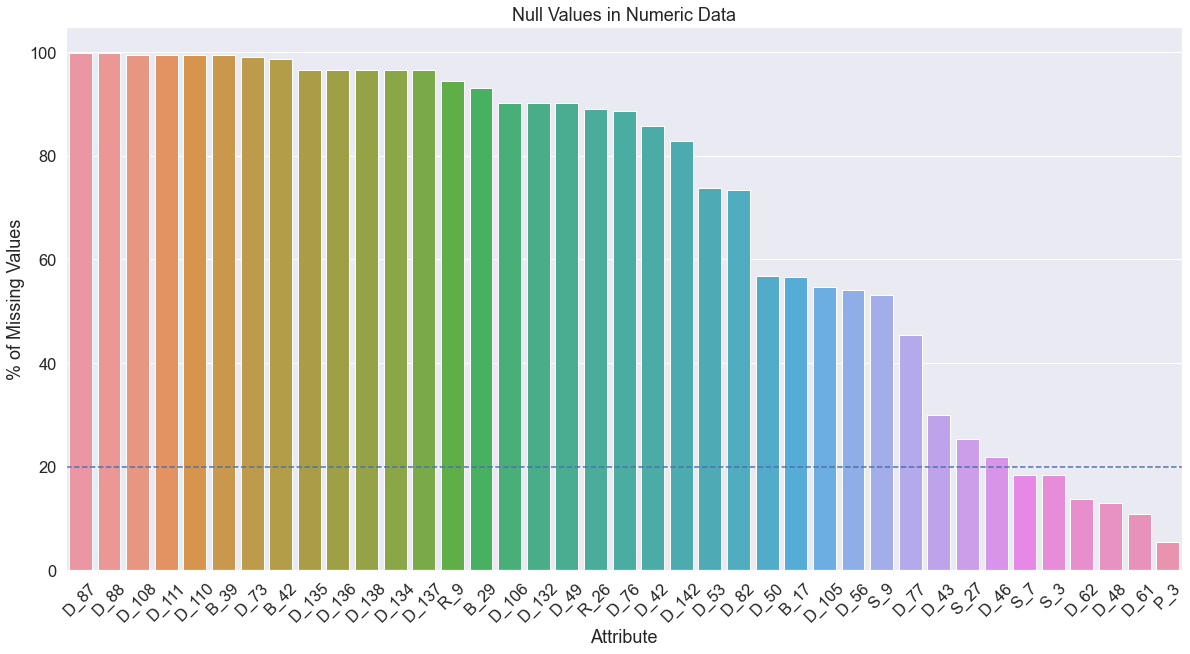

In [37]:
#nulss above limit
pctNulls = 5
numericNulls = numericNulls[numericNulls > pctNulls]

#To DF
numericNullsDf = numericNulls.to_frame(name = 'numericNulls')
numericNullsDf = numericNullsDf.sort_values('numericNulls',\
                                            ascending=False)

# figure for missing values
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=numericNullsDf.index,\
                 y=numericNullsDf.numericNulls,\
                 data=numericNullsDf)
ax.axhline(x, ls='--')

ax.set(title='Null Values in Numeric Data')
ax.set(xlabel="Attribute", ylabel='% of Missing Values')

plt.xticks(rotation=45)
plt.show()

In [38]:
print('Number of columns with nulls above ' + \
      str(pctNulls) + '% is -> ' + str(numericNulls.shape[0]))

Number of columns with nulls above 5% is -> 39


In [39]:
#Limit of nulls aceptable function
numericNullsDf_aboveXpct = numericNullsDf[numericNullsDf > x].dropna()
cols2Drop = numericNullsDf_aboveXpct.index
cols2Drop

Index(['D_87', 'D_88', 'D_108', 'D_111', 'D_110', 'B_39', 'D_73', 'B_42',
       'D_135', 'D_136', 'D_138', 'D_134', 'D_137', 'R_9', 'B_29', 'D_106',
       'D_132', 'D_49', 'R_26', 'D_76', 'D_42', 'D_142', 'D_53', 'D_82',
       'D_50', 'B_17', 'D_105', 'D_56', 'S_9', 'D_77', 'D_43', 'S_27', 'D_46'],
      dtype='object')

In [40]:
#Drop variables with to many nulls
train_data_numeric_clean = train_data_numeric.drop(columns= cols2Drop)
train_data_numeric_clean

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,0.943167,0.001439,0.851670,0.803006,0.000605,0.121406,0.000648,0.003691,0.001759,0.000749,...,0.008124,0.006268,0.006182,0.009707,0.003581,0.006864,0.006467,0.003686,0.006230,0.001453
1,0.946222,0.001860,0.851974,0.804507,0.001654,NaN,0.000908,0.000659,0.001574,0.000993,...,0.004223,0.003033,0.000136,0.004182,0.001673,0.006022,0.006765,0.002781,0.002196,0.001256
2,0.949374,0.006760,0.854587,0.810777,0.002111,NaN,0.000922,0.003863,0.000018,0.000357,...,0.009443,0.005091,0.003562,0.000341,0.007480,0.006490,0.001784,0.003504,0.002021,0.000130
3,0.941653,0.000434,0.852116,0.810545,0.000429,NaN,0.000790,0.005724,0.002371,0.000236,...,0.006358,0.006476,0.003170,0.005984,0.008610,0.009642,0.006175,0.001329,0.006541,0.001295
4,0.892255,0.000031,0.852326,0.803060,0.001366,NaN,0.001089,0.002249,0.001985,0.000558,...,0.006840,0.000537,0.005624,0.009235,0.003956,0.003083,0.007079,0.009345,0.000568,0.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.886828,0.001548,0.854490,0.802352,0.000121,0.111773,0.000742,0.002412,NaN,0.004744,...,0.005017,0.004790,0.003589,0.004580,0.007704,0.000702,0.001592,0.003662,0.000322,0.001041
1382858,0.657423,0.012443,0.880477,0.053598,0.003196,0.120650,0.000393,0.218978,0.093827,0.133641,...,0.978293,0.005117,0.005545,0.009705,0.003342,0.002786,0.003502,0.009883,0.003238,0.001617
1382859,0.974472,0.111552,0.856418,0.994162,0.000562,0.119861,0.000677,0.002778,0.002150,0.017058,...,0.002481,0.002225,0.003809,0.003172,0.005630,0.007638,0.004234,0.000412,0.002065,0.000176
1382860,0.385192,0.116025,0.868309,0.055377,0.334158,0.135078,0.031259,0.157423,0.000671,0.014427,...,0.003770,0.006124,0.005494,0.001497,0.994323,0.006724,0.647595,0.999719,0.006688,0.020748


In [41]:
#Correlation Matrix
corr = train_data_numeric_clean.corr().abs()

In [42]:
#Top Correlations
topCorr = corr.unstack().sort_values(ascending=False)

topCorrDF = topCorr.to_frame()
topCorrDF.reset_index(inplace=True)
topCorrDF['Keep'] = topCorrDF['level_0'] != topCorrDF['level_1'] 
topCorrDF = topCorrDF[topCorrDF['Keep']]
topCorrDF = topCorrDF.drop(columns=['Keep'])
topCorrDF.columns = ['ATTR A','ATTR B','Corr.']
topCorrDF.head(10)


,ATTR A,ATTR B,Corr.
144,D_104,D_103,0.999750
145,D_103,D_104,0.999750
146,D_139,D_143,0.999503
147,D_143,D_139,0.999503
148,D_141,D_139,0.998176
149,D_139,D_141,0.998176
150,D_143,D_141,0.997699
151,D_141,D_143,0.997699
152,B_1,B_11,0.995150
153,B_11,B_1,0.995150


In [43]:
#High Corrlated values
topCorrDFHC = topCorrDF[topCorrDF['Corr.'] > 0.85]
topCorrDFHC.shape

(40, 3)

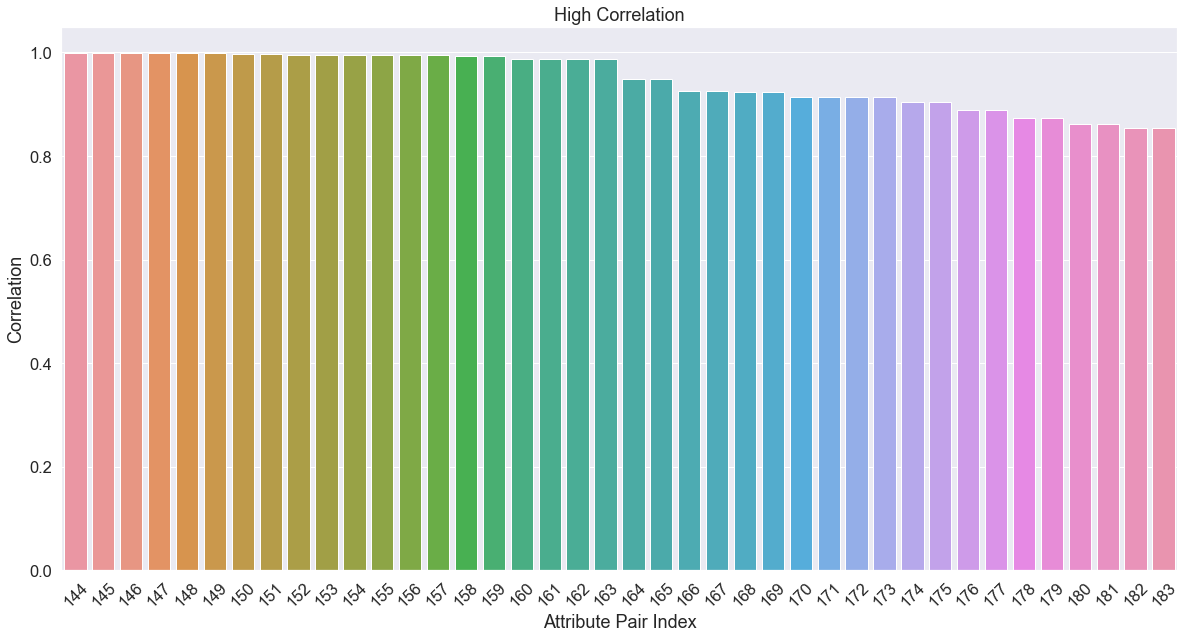

In [44]:
# figure for corrlations
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)
ax = plt.subplots(figsize=(20,10), sharex=True)


ax = sns.barplot(x=topCorrDFHC.index,\
                 y=topCorrDFHC['Corr.'],\
                 data=topCorrDFHC)

ax.set(title='High Correlation')
ax.set(xlabel="Attribute Pair Index", ylabel='Correlation')

plt.xticks(rotation=45)
plt.show()

In [45]:

#Column to identify which attributes to remove
topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))
topCorrDFHC.head()

,ATTR A,ATTR B,Corr.,Running
144,D_104,D_103,0.999750,0
145,D_103,D_104,0.999750,1
146,D_139,D_143,0.999503,2
147,D_143,D_139,0.999503,3
148,D_141,D_139,0.998176,4


In [46]:
#Remove pair for high correaltions
topCorrDFHC = topCorrDFHC[topCorrDFHC.index%2==0]
topCorrDFHC.head()

,ATTR A,ATTR B,Corr.,Running
144,D_104,D_103,0.999750,0
146,D_139,D_143,0.999503,2
148,D_141,D_139,0.998176,4
150,D_143,D_141,0.997699,6
152,B_1,B_11,0.995150,8


In [47]:
#Drop variables with high correlation 
train_data_numeric_clean_HC = \
train_data_numeric_clean.drop(columns= topCorrDFHC['ATTR A'])
train_data_numeric_clean_HC

,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,D_45,...,D_127,D_128,D_129,B_41,D_130,D_133,R_28,D_140,D_144,D_145
0,0.943167,0.001439,0.803006,0.000605,0.121406,0.000648,0.003691,0.001759,0.000749,0.217277,...,0.005833,0.978277,0.003479,0.000011,0.008124,0.006182,0.009707,0.006864,0.006230,0.001453
1,0.946222,0.001860,0.804507,0.001654,NaN,0.000908,0.000659,0.001574,0.000993,0.207245,...,0.004478,0.983840,0.003033,0.000314,0.004223,0.000136,0.004182,0.006022,0.002196,0.001256
2,0.949374,0.006760,0.810777,0.002111,NaN,0.000922,0.003863,0.000018,0.000357,0.202475,...,0.001902,0.986623,0.006288,0.000461,0.009443,0.003562,0.000341,0.006490,0.002021,0.000130
3,0.941653,0.000434,0.810545,0.000429,NaN,0.000790,0.005724,0.002371,0.000236,0.206652,...,0.000434,0.983448,0.007708,0.000235,0.006358,0.003170,0.005984,0.009642,0.006541,0.001295
4,0.892255,0.000031,0.803060,0.001366,NaN,0.001089,0.002249,0.001985,0.000558,0.202466,...,0.000588,0.983394,0.007036,0.000101,0.006840,0.005624,0.009235,0.003083,0.000568,0.000791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.886828,0.001548,0.802352,0.000121,0.111773,0.000742,0.002412,NaN,0.004744,0.229628,...,0.009631,0.986869,0.005698,0.000109,0.005017,0.003589,0.004580,0.000702,0.000322,0.001041
1382858,0.657423,0.012443,0.053598,0.003196,0.120650,0.000393,0.218978,0.093827,0.133641,0.271574,...,0.000265,0.003215,0.009250,0.000282,0.978293,0.005545,0.009705,0.002786,0.003238,0.001617
1382859,0.974472,0.111552,0.994162,0.000562,0.119861,0.000677,0.002778,0.002150,0.017058,0.224963,...,0.990800,0.987687,0.991865,0.000011,0.002481,0.003809,0.003172,0.007638,0.002065,0.000176
1382860,0.385192,0.116025,0.055377,0.334158,0.135078,0.031259,0.157423,0.000671,0.014427,0.025462,...,0.008986,0.982404,0.001532,0.000310,0.003770,0.005494,0.001497,0.006724,0.006688,0.020748


In [48]:
trainSD = train_data_numeric_clean_HC.std().sort_values(ascending=False)
trainSD = trainSD.to_frame()
trainSD

,0
D_103,0.493651
D_129,0.490853
B_8,0.487570
D_128,0.482803
S_6,0.422371
...,...
B_6,0.001808
B_40,0.001773
B_10,0.001187
D_69,0.001000


In [49]:
#Low variation
SDMin = 0.1
trainSDLow = trainSD[trainSD[0] < SDMin]
trainSDLow.shape

(80, 1)

In [50]:
#Low variation to drop
cols2DropLow = trainSDLow.index
cols2DropLow

Index(['D_93', 'D_51', 'D_59', 'D_124', 'R_1', 'D_72', 'B_22', 'D_75', 'D_91',
       'S_11', 'S_17', 'B_7', 'R_22', 'R_25', 'D_44', 'B_31', 'D_39', 'P_3',
       'B_4', 'R_6', 'D_81', 'D_145', 'D_109', 'D_70', 'D_107', 'S_3', 'S_15',
       'S_25', 'D_80', 'D_113', 'D_78', 'D_125', 'R_28', 'R_10', 'R_11',
       'B_36', 'R_3', 'D_41', 'D_62', 'D_89', 'R_23', 'D_84', 'R_5', 'B_41',
       'D_79', 'R_16', 'B_28', 'R_8', 'B_9', 'R_13', 'S_19', 'R_20', 'B_25',
       'B_24', 'S_24', 'D_83', 'D_61', 'R_17', 'D_71', 'B_14', 'R_7', 'S_26',
       'R_18', 'S_16', 'B_27', 'S_5', 'B_5', 'S_12', 'B_21', 'R_14', 'B_26',
       'D_123', 'D_65', 'B_12', 'B_13', 'B_6', 'B_40', 'B_10', 'D_69', 'S_23'],
      dtype='object')

In [51]:
#Drop variables low variation
train_data_numeric_clean_HC_HighVariation = train_data_numeric_clean_HC.drop(columns= cols2DropLow)
train_data_numeric_clean_HC_HighVariation

,P_2,B_2,B_3,D_45,R_2,D_47,B_8,D_52,B_11,S_6,...,D_118,D_121,D_122,D_127,D_128,D_129,D_130,D_133,D_140,D_144
0,0.943167,0.803006,0.003691,0.217277,0.005214,0.278446,0.006600,0.091181,0.005208,0.005214,...,0.280260,0.428411,0.217113,0.005833,0.978277,0.003479,0.008124,0.006182,0.006864,0.006230
1,0.946222,0.804507,0.000659,0.207245,0.007074,0.264662,0.003365,0.073410,0.001528,0.994862,...,0.269544,0.420209,0.215659,0.004478,0.983840,0.003033,0.004223,0.000136,0.006022,0.002196
2,0.949374,0.810777,0.003863,0.202475,0.005159,0.263663,0.003792,0.074892,0.004145,0.992125,...,0.268298,0.420669,0.214642,0.001902,0.986623,0.006288,0.009443,0.003562,0.006490,0.002021
3,0.941653,0.810545,0.005724,0.206652,0.000872,0.267783,0.003015,0.078058,0.003738,0.991035,...,0.271641,0.419080,0.218514,0.000434,0.983448,0.007708,0.006358,0.003170,0.009642,0.006541
4,0.892255,0.803060,0.002249,0.202466,0.001217,0.264734,0.008497,0.082386,0.005146,0.994267,...,0.264905,0.416832,0.213624,0.000588,0.983394,0.007036,0.006840,0.005624,0.003083,0.000568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,0.886828,0.802352,0.002412,0.229628,0.006048,0.313437,0.001500,0.020456,0.004758,0.008874,...,0.095119,0.334487,0.145718,0.009631,0.986869,0.005698,0.005017,0.003589,0.000702,0.000322
1382858,0.657423,0.053598,0.218978,0.271574,0.008068,0.343782,0.001387,0.196875,0.133255,0.003447,...,0.347122,0.390731,0.215943,0.000265,0.003215,0.009250,0.978293,0.005545,0.002786,0.003238
1382859,0.974472,0.994162,0.002778,0.224963,0.000503,0.207675,0.003861,0.303640,0.022233,0.003449,...,0.031942,0.247495,0.358619,0.990800,0.987687,0.991865,0.002481,0.003809,0.007638,0.002065
1382860,0.385192,0.055377,0.157423,0.025462,0.997237,0.225601,0.984624,0.047988,0.078411,0.007045,...,0.012613,0.344452,0.072484,0.008986,0.982404,0.001532,0.003770,0.005494,0.006724,0.006688


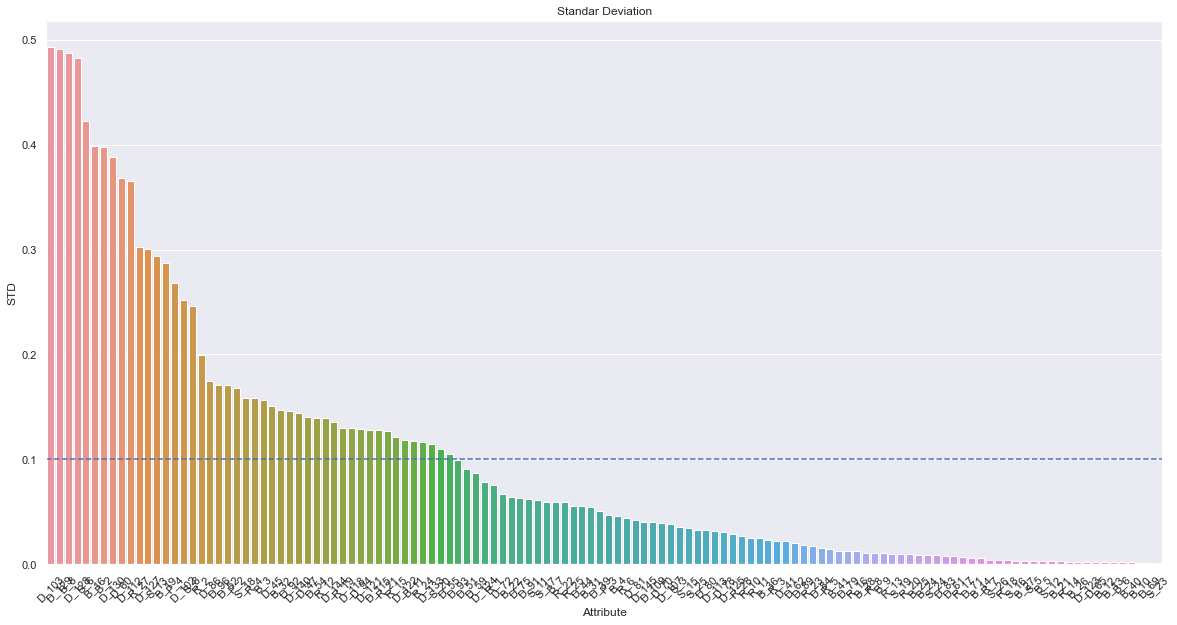

In [52]:
# figure Standard Devation
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=trainSD.index,\
                 y=trainSD[0],\
                 data=trainSD)

ax.set(title='Standar Deviation')
ax.set(xlabel="Attribute", ylabel='STD')
ax.axhline(SDMin, ls='--')

plt.xticks(rotation=45)
plt.show()

In [53]:
Delinquency = train_data_numeric_clean_HC.filter(regex='D')
Delinquency = pd.concat([Delinquency,y], axis = 1)
Delinquency.head()

,D_39,D_41,D_44,D_45,D_47,D_51,D_52,D_54,D_55,D_59,...,D_125,D_127,D_128,D_129,D_130,D_133,D_140,D_144,D_145,target
0,0.001439,0.000648,0.001759,0.217277,0.278446,0.126442,0.091181,0.995565,0.031028,0.128413,...,0.000520,0.005833,0.978277,0.003479,0.008124,0.006182,0.006864,0.006230,0.001453,0
1,0.001860,0.000908,0.001574,0.207245,0.264662,0.126549,0.073410,0.991455,0.027984,0.131504,...,0.000467,0.004478,0.983840,0.003033,0.004223,0.000136,0.006022,0.002196,0.001256,0
2,0.006760,0.000922,0.000018,0.202475,0.263663,0.252123,0.074892,0.991861,0.015171,0.129006,...,0.000831,0.001902,0.986623,0.006288,0.009443,0.003562,0.006490,0.002021,0.000130,0
3,0.000434,0.000790,0.002371,0.206652,0.267783,0.124625,0.078058,0.996781,0.027834,0.131082,...,0.000886,0.000434,0.983448,0.007708,0.006358,0.003170,0.009642,0.006541,0.001295,0
4,0.000031,0.001089,0.001985,0.202466,0.264734,0.002933,0.082386,0.992365,0.016109,0.138394,...,0.000330,0.000588,0.983394,0.007036,0.006840,0.005624,0.003083,0.000568,0.000791,0


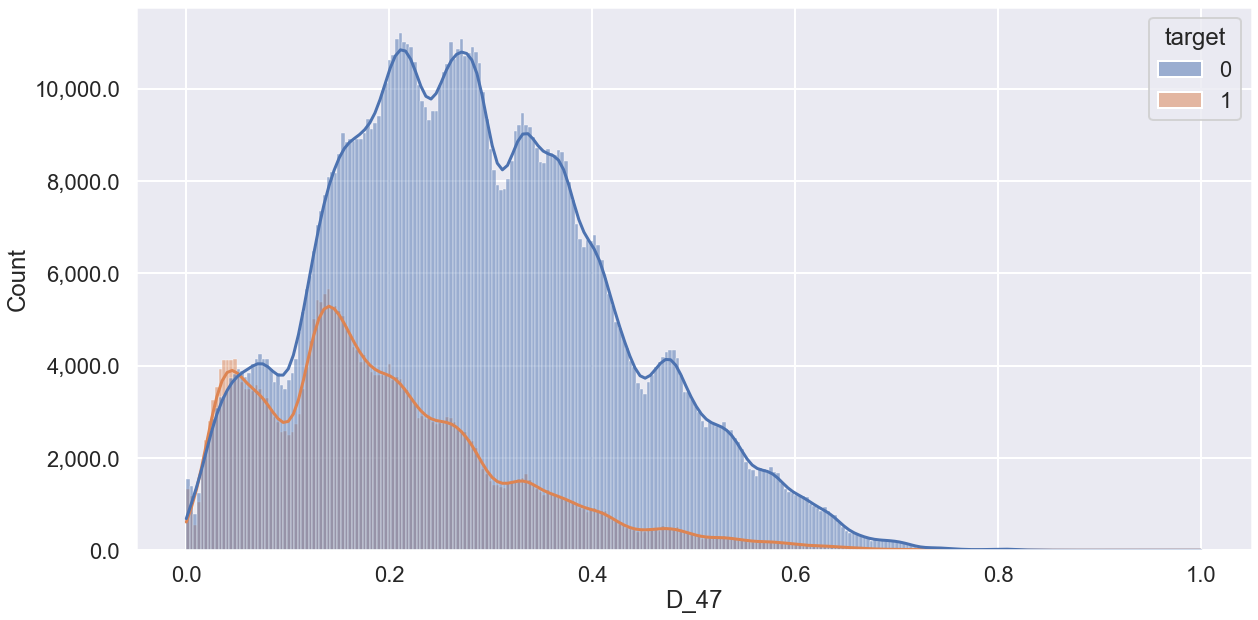

In [54]:
#Figure config
sns.set_theme(style="darkgrid")
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.histplot(data=Delinquency, x="D_47", kde=True, hue="target")

#Format Axis
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

plt.show()

In [55]:
N = 18
# Select first N columns
First_n_column_Deli  = Delinquency.iloc[: , 1:N]
Middle_n_column_Deli  = Delinquency.iloc[: , 18:36]
Last_n_column_Deli  = Delinquency.iloc[: , -N:]

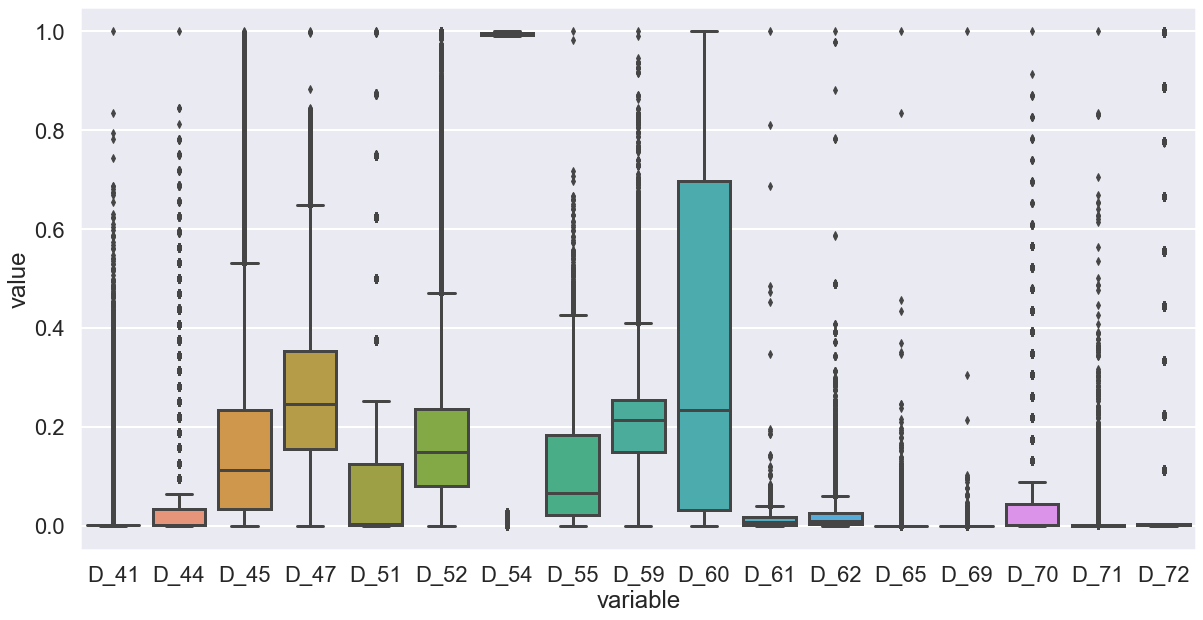

In [56]:
#Boxplot of Delinquency first columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(First_n_column_Deli))

plt.show()

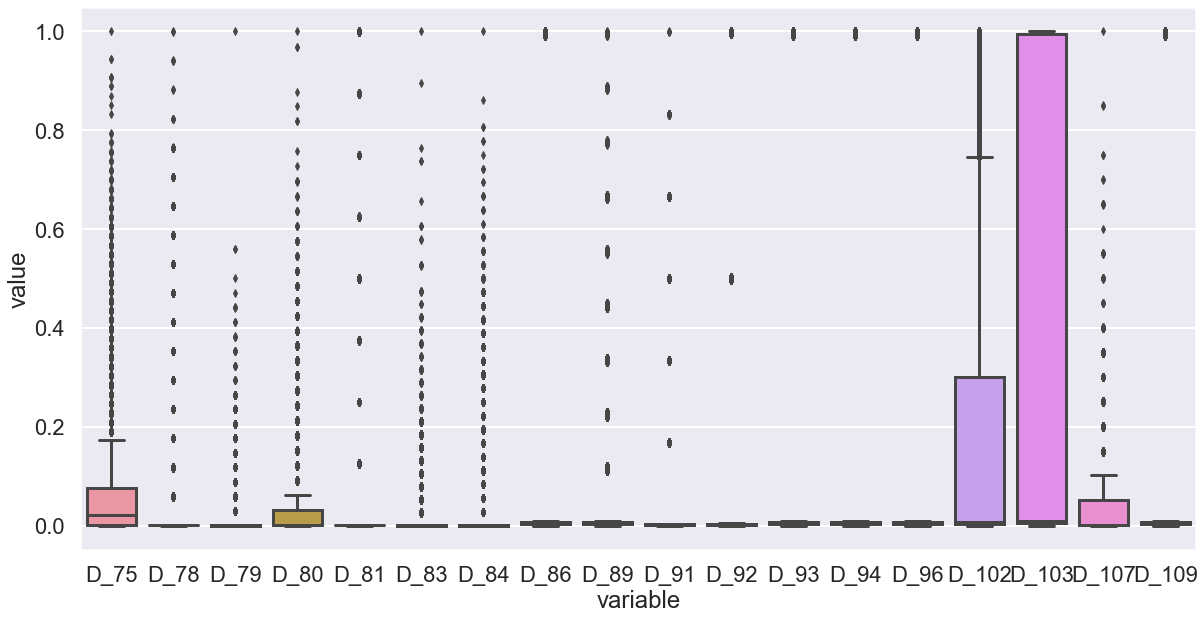

In [57]:
#Boxplot of Delinquency midle columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Middle_n_column_Deli))

plt.show()

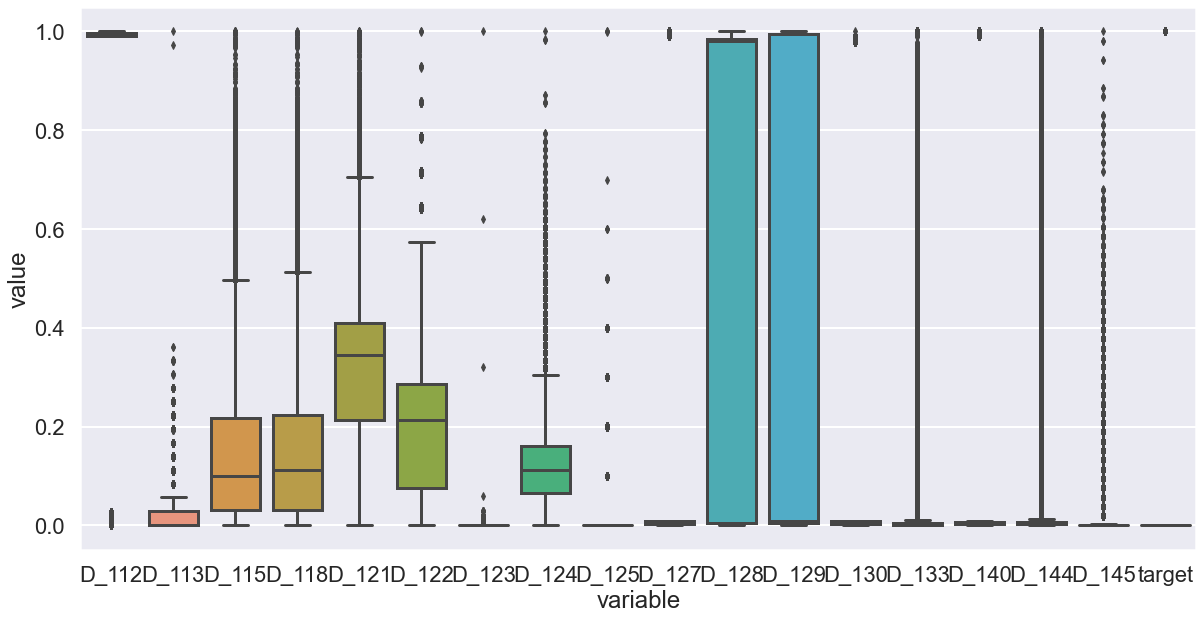

In [58]:
#Boxplot of Delinquency last columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Last_n_column_Deli))

plt.show()

In [59]:
Risk = train_data_numeric_clean_HC.filter(regex='R')
Risk.head()

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_10,R_11,...,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_27,R_28
0,0.000605,0.005214,0.000061,0.003825,0.000217,0.000404,0.000005,0.000283,0.000282,0.000456,...,0.011932,0.007792,0.000012,0.009350,0.004797,0.003644,0.003990,0.007145,0.993752,0.009707
1,0.001654,0.007074,0.000680,0.006623,0.000083,0.000601,0.000002,0.000278,0.000646,0.000400,...,0.003310,0.001579,0.000117,0.009011,0.001294,0.004087,0.000642,0.000604,0.994752,0.004182
2,0.002111,0.005159,0.000558,0.005790,0.000317,0.000191,0.000022,0.000318,0.000711,0.000793,...,0.005396,0.000692,0.000124,0.001557,0.001288,0.002357,0.004866,0.003474,0.993842,0.000341
3,0.000429,0.000872,0.001028,0.007327,0.000032,0.000093,0.000005,0.000167,0.000418,0.000438,...,0.007771,0.009374,0.000237,0.000184,0.003036,0.004601,0.001651,0.002425,0.996124,0.005984
4,0.001366,0.001217,0.000491,0.001130,0.000489,0.000402,0.000022,0.000021,0.000814,0.001403,...,0.009415,0.007337,0.000160,0.008575,0.001608,0.009728,0.003868,0.008123,0.993771,0.009235


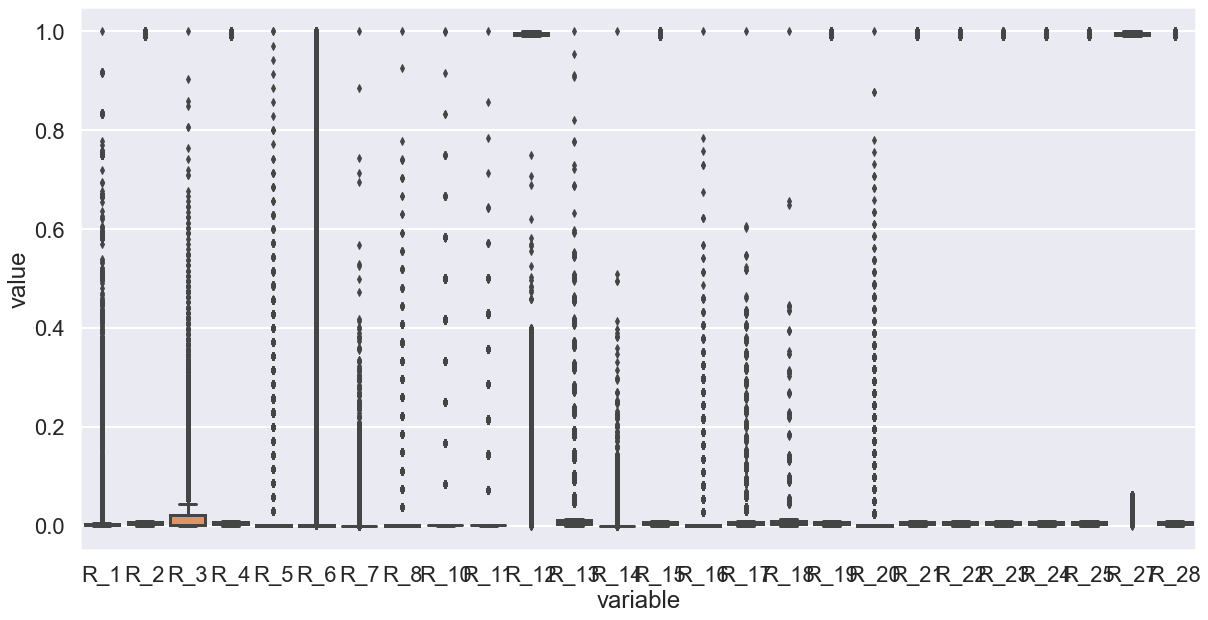

In [60]:
#Boxplot of Delinquency last columns
ax = plt.subplots(figsize=(20,10), sharex=True)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Risk))

plt.show()

In [61]:
Spend = train_data_numeric_clean_HC.filter(regex='S')
Spend.shape

(1382862, 17)

In [62]:
Payment = train_data_numeric_clean_HC.filter(regex='P')
Payment.head()

,P_2,P_3,P_4
0,0.943167,0.500651,0.007376
1,0.946222,0.513511,0.004798
2,0.949374,0.508359,0.005121
3,0.941653,0.498158,0.004530
4,0.892255,0.419866,0.003750


In [63]:
Balance = train_data_numeric_clean_HC.filter(regex='B')
Balance.head()

,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,...,B_24,B_25,B_26,B_27,B_28,B_31,B_32,B_36,B_40,B_41
0,0.803006,0.003691,0.000749,0.000100,0.000298,0.680325,0.006600,9.924800e-05,0.000074,0.005208,...,0.000100,0.325391,2.842914e-06,0.004839,0.000264,1.0,0.009765,0.007778,9.204363e-07,0.000011
1,0.804507,0.000659,0.000993,0.000137,0.002001,0.680027,0.003365,2.057744e-05,0.000060,0.001528,...,0.000233,0.325367,2.526015e-06,0.001997,0.000307,1.0,0.002225,0.001572,2.187411e-07,0.000314
2,0.810777,0.003863,0.000357,0.000044,0.001868,0.685657,0.003792,4.960705e-04,0.000061,0.004145,...,0.000007,0.325894,2.652506e-07,0.005544,0.000282,1.0,0.008761,0.003258,1.101573e-06,0.000461
3,0.810545,0.005724,0.000236,0.000014,0.001375,0.681211,0.003015,1.839471e-06,0.000059,0.003738,...,0.000248,0.325665,7.721467e-06,0.000327,0.000212,1.0,0.001472,0.002829,1.621079e-06,0.000235
4,0.803060,0.002249,0.000558,0.000059,0.001884,0.681255,0.008497,8.627963e-07,0.000060,0.005146,...,0.000112,0.325434,7.921410e-06,0.001751,0.000391,1.0,0.003353,0.005404,1.105298e-06,0.000101


In [64]:
Delinquency.describe()

,D_39,D_41,D_44,D_45,D_47,D_51,D_52,D_54,D_55,D_59,...,D_125,D_127,D_128,D_129,D_130,D_133,D_140,D_144,D_145,target
count,1.382862e+06,1.382343e+06,1.314187e+06,1.382343e+06,1.382862e+06,1.382862e+06,1.375332e+06,1.382343e+06,1.336385e+06,1.356345e+06,...,1.338969e+06,1.382862e+06,1.357631e+06,1.357631e+06,1.357631e+06,1.372203e+06,1.372721e+06,1.372696e+06,1.357631e+06,1.382862e+06
mean,2.856787e-02,6.650836e-03,2.954120e-02,1.574101e-01,2.603914e-01,5.419247e-02,1.839056e-01,9.749200e-01,1.090536e-01,2.058689e-01,...,8.428144e-03,1.065885e-01,5.720519e-01,4.356628e-01,1.967691e-01,3.068364e-02,2.640800e-02,3.895597e-02,1.296137e-02,2.489713e-01
std,5.035815e-02,2.254347e-02,5.517285e-02,1.512951e-01,1.408244e-01,9.052843e-02,1.708019e-01,1.395046e-01,1.055422e-01,8.688743e-02,...,2.916883e-02,3.005131e-01,4.828034e-01,4.908533e-01,3.882526e-01,1.143376e-01,1.442001e-01,1.357609e-01,4.024734e-02,4.324173e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.471143e-04,3.200449e-04,9.549422e-04,3.415710e-02,1.554563e-01,1.362269e-03,7.954818e-02,9.924333e-01,2.088672e-02,1.485004e-01,...,2.693673e-04,2.761051e-03,5.822977e-03,4.390408e-03,3.038925e-03,1.800812e-03,2.531681e-03,2.046808e-03,6.268073e-04,0.000000e+00
50%,1.691117e-03,6.391192e-04,1.913362e-03,1.130645e-01,2.460335e-01,2.721025e-03,1.489240e-01,9.949539e-01,6.659333e-02,2.131143e-01,...,5.392643e-04,5.517622e-03,9.794810e-01,8.767734e-03,6.081547e-03,3.599218e-03,5.062094e-03,4.093439e-03,1.253069e-03,0.000000e+00
75%,4.413866e-02,9.583383e-04,3.293706e-02,2.329924e-01,3.530662e-01,1.255492e-01,2.360071e-01,9.974819e-01,1.833721e-01,2.534418e-01,...,8.092364e-04,8.273237e-03,9.837013e-01,9.943042e-01,9.118767e-03,5.406382e-03,7.588007e-03,6.146700e-03,1.881468e-03,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Modeling

***

## Logistic Regression

In [65]:
#Delcare X Variables

#Concat cataagorical variables

#X1 is all cleaned attributes
X = pd.concat([train_data_numeric_clean_HC,train_data_Cat_dum],\
              axis = 1) 

#Fill Nan with mean
X = X.fillna(X.mean())

#Add constant
X = sm.add_constant(X)
X.head()

,const,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,1.0,0.943167,0.001439,0.803006,0.000605,0.121406,0.000648,0.003691,0.001759,0.000749,...,1,0,0,0,0,0,0,0,0,1
1,1.0,0.946222,0.001860,0.804507,0.001654,0.136075,0.000908,0.000659,0.001574,0.000993,...,1,0,0,0,0,0,0,0,0,1
2,1.0,0.949374,0.006760,0.810777,0.002111,0.136075,0.000922,0.003863,0.000018,0.000357,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.941653,0.000434,0.810545,0.000429,0.136075,0.000790,0.005724,0.002371,0.000236,...,1,0,0,0,0,0,0,0,0,1
4,1.0,0.892255,0.000031,0.803060,0.001366,0.136075,0.001089,0.002249,0.001985,0.000558,...,1,0,0,0,0,0,0,0,0,1


In [66]:
dataAX = pd.concat([y,X], axis = 1)
dataAX.head()

,target,const,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,...,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0,1.0,0.943167,0.001439,0.803006,0.000605,0.121406,0.000648,0.003691,0.001759,...,1,0,0,0,0,0,0,0,0,1
1,0,1.0,0.946222,0.001860,0.804507,0.001654,0.136075,0.000908,0.000659,0.001574,...,1,0,0,0,0,0,0,0,0,1
2,0,1.0,0.949374,0.006760,0.810777,0.002111,0.136075,0.000922,0.003863,0.000018,...,1,0,0,0,0,0,0,0,0,1
3,0,1.0,0.941653,0.000434,0.810545,0.000429,0.136075,0.000790,0.005724,0.002371,...,1,0,0,0,0,0,0,0,0,1
4,0,1.0,0.892255,0.000031,0.803060,0.001366,0.136075,0.001089,0.002249,0.001985,...,1,0,0,0,0,0,0,0,0,1


In [67]:
#Split Data in Train and Test
train, test = train_test_split(dataAX,\
                               test_size = 0.25, random_state = 7) 

In [68]:
#Segreagate y
y_test = pd.DataFrame(test[['target']])
y_train = pd.DataFrame(train[['target']])

#drop target from Test and Tain
X_test = test.drop(columns=['target'])
X_train = train.drop(columns=['target'])

In [69]:
y_train.value_counts()

target
0         779149
1         257997
dtype: int64

In [70]:
X_train.head()

,const,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_64_O,D_64_R,D_64_U,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
121985,1.0,0.839607,0.001675,0.025727,0.014935,0.251777,0.029646,0.466675,0.001008,0.077756,...,1,0,0,0,0,0,0,0,0,1
683487,1.0,0.756511,0.001013,0.005143,0.002647,0.127882,0.058789,0.152223,0.032971,0.040748,...,0,0,1,0,0,0,0,0,0,1
1286561,1.0,0.935754,0.088366,0.991305,0.000141,0.107768,0.000135,0.003547,0.000116,0.300424,...,1,0,0,0,0,0,0,0,0,1
780480,1.0,0.723083,0.034658,0.990176,0.000042,0.097547,0.000535,0.013611,0.000688,0.011401,...,1,0,0,0,0,0,0,0,0,1
752272,1.0,0.741586,0.110595,0.999319,0.001104,0.132929,0.000690,0.010083,0.032876,0.116105,...,0,0,1,0,0,0,0,0,1,0


In [71]:
#Logictic Regression
logreg01 = sm.Logit(y_train, X_train).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.285299
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.491      
Dependent Variable:   target             AIC:                592121.4730
Date:                 2022-09-13 16:11   BIC:                594065.1982
No. Observations:     1037146            Log-Likelihood:     -2.9590e+05
Df Model:             163                LL-Null:            -5.8180e+05
Df Residuals:         1036982            LLR p-value:        0.0000     
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       11.0000                                           
------------------------------------------------------------------------
            Coef.    Std.Err.      z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
const      -11.9003 17657.6690   -0.0007 0.9995  -34620.2955  34596.4950
P_2         -4.9767     0.0417 -119.2689 0.0000      -5.0585     -4.8949
D_39         2.2207     0.0757   29.3425 0.0000       2.0723      2.3690
B_2         -0.2217     0.0162  -13.7083 0.0000      -0.2533     -0.1900
R_1          1.5925     0.1172   13.5876 0.0000       1.3628      1.8222
S_3          5.0995     0.1096   46.5280 0.0000       4.8847      5.3143
D_41         3.9138     0.2242   17.4557 0.0000       3.4743      4.3532
B_3          1.1615     0.0360   32.2516 0.0000       1.0909      1.2321
D_44         1.9863     0.0980   20.2619 0.0000       1.7941      2.1784
B_4          6.0942     0.1221   49.8931 0.0000       5.8548      6.3336
D_45        -0.6091     0.0488  -12.4830 0.0000      -0.7048     -0.5135
B_5        -17.3381     2.6190   -6.6201 0.0000     -22.4712    -12.2049
R_2          0.1032     0.0335    3.0776 0.0021       0.0375      0.1689
D_47        -1.1822     0.0415  -28.4792 0.0000      -1.2635     -1.1008
B_6        -24.7004     7.9671   -3.1003 0.0019     -40.3157     -9.0851
B_7          1.4381     0.0849   16.9393 0.0000       1.2717      1.6045
B_8          0.4189     0.0118   35.5923 0.0000       0.3958      0.4420
D_51        -2.8855     0.0969  -29.7865 0.0000      -3.0754     -2.6956
B_9          4.2447     0.3894   10.9008 0.0000       3.4815      5.0079
R_3         10.1660     0.1822   55.8071 0.0000       9.8089     10.5230
D_52        -0.1761     0.0240   -7.3486 0.0000      -0.2230     -0.1291
P_3          1.0133     0.0824   12.2946 0.0000       0.8518      1.1749
B_10         2.6377     5.2031    0.5069 0.6122      -7.5602     12.8355
S_5          4.8754     1.1065    4.4062 0.0000       2.7067      7.0441
B_11         1.1396     0.0432   26.3762 0.0000       1.0549      1.2243
S_6          0.0083     0.0131    0.6317 0.5276      -0.0174      0.0340
D_54        -0.2694     0.0248  -10.8659 0.0000      -0.3180     -0.2208
R_4          0.0197     0.0461    0.4283 0.6684      -0.0706      0.1101
B_12       -15.3154     7.5344   -2.0327 0.0421     -30.0825     -0.5483
S_8         -0.3129     0.0318   -9.8407 0.0000      -0.3752     -0.2506
D_55        -0.0377     0.0612   -0.6167 0.5375      -0.1576      0.0822
B_13        20.4917     4.4766    4.5775 0.0000      11.7178     29.2656
R_5          0.4641     1.0344    0.4486 0.6537      -1.5634      2.4915
B_14        17.7726     1.4589   12.1821 0.0000      14.9132     20.6320
D_59        -0.2504     0.0427   -5.8620 0.0000      -0.3342     -0.1667
D_60         0.1052     0.0153    6.8868 0.0000       0.0753      0.1352
D_61        16.1832     0.8175   19.7956 0.0000      14.5809     17.7855
S_11        -1.4307     0.0656  -21.7971 0.0000      -1.5593     -1.3021
D_62       -11.4125     0.3860  -29.5650 0.0000     -12.1690    -10.6559
D_65         9.2466     1.8308    5.0506 0.0000       5.6583     12.8349
B_16        -0.0499     0.0185   -2.6936 0.0071      -0.0861     -0.0136
B_19         0.1349     0.0210    6.42

In [72]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

In [73]:
summaryDF = results_summary_to_dataframe(logreg01)
summaryDF

,coeff,pvals,conf_lower,conf_higher
const,-11.900278,9.994623e-01,-34620.295528,34596.494972
P_2,-4.976694,0.000000e+00,-5.058477,-4.894912
D_39,2.220664,2.981905e-189,2.072332,2.368996
B_2,-0.221651,9.050937e-43,-0.253341,-0.189960
R_1,1.592497,4.744429e-42,1.362785,1.822209
...,...,...,...,...
D_68_2.0,-0.074398,1.521009e-01,-0.176216,0.027419
D_68_3.0,-0.060150,2.362959e-01,-0.159695,0.039396
D_68_4.0,-0.064972,1.993234e-01,-0.164189,0.034245
D_68_5.0,-0.098376,4.975781e-02,-0.196647,-0.000104


In [74]:
summaryDF_05 = summaryDF[summaryDF.pvals > 0.02]
cols2DropSum = summaryDF_05.index

In [75]:
#X2 is X_train - col with los high P Value
X2 = X_train.drop(columns= cols2DropSum)
X2_test = X_test.drop(columns= cols2DropSum)
X2

,P_2,D_39,B_2,R_1,S_3,D_41,B_3,D_44,B_4,D_45,...,D_117_2.0,D_117_3.0,D_117_4.0,D_117_5.0,D_117_6.0,D_120_0.0,D_120_1.0,D_126_-1.0,D_126_0.0,D_126_1.0
121985,0.839607,0.001675,0.025727,0.014935,0.251777,0.029646,0.466675,0.001008,0.077756,0.056634,...,0,0,0,1,0,0,1,1,0,0
683487,0.756511,0.001013,0.005143,0.002647,0.127882,0.058789,0.152223,0.032971,0.040748,0.168666,...,0,0,0,0,0,1,0,0,0,1
1286561,0.935754,0.088366,0.991305,0.000141,0.107768,0.000135,0.003547,0.000116,0.300424,0.495824,...,0,0,0,0,0,1,0,0,1,0
780480,0.723083,0.034658,0.990176,0.000042,0.097547,0.000535,0.013611,0.000688,0.011401,0.759172,...,0,0,0,0,0,1,0,0,0,1
752272,0.741586,0.110595,0.999319,0.001104,0.132929,0.000690,0.010083,0.032876,0.116105,0.159147,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839891,0.351613,0.170148,0.006645,0.502296,0.172000,0.041408,0.229085,0.125741,0.028033,0.014608,...,0,0,0,0,0,0,1,0,0,1
535030,0.629588,0.027574,0.073538,0.000003,0.127819,0.000793,0.121023,0.031441,0.013735,0.209325,...,0,1,0,0,0,1,0,0,0,1
573977,0.744615,0.016966,0.092667,0.083834,0.123801,0.000967,0.325146,0.063202,0.273254,0.463755,...,0,0,1,0,0,1,0,0,0,1
1238212,0.726083,0.000008,0.809848,0.001320,0.136075,0.000980,0.005022,0.002392,0.046713,0.047651,...,0,0,1,0,0,1,0,0,1,0


In [76]:
#Logictic Regression with significant variables 
logreg02 = sm.Logit(y_train, X2).fit()
logreg02.summary2()

Optimization terminated successfully.
         Current function value: 0.286547
         Iterations 26


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.489      
Dependent Variable:   target             AIC:                594596.8577
Date:                 2022-09-13 16:12   BIC:                595865.0199
No. Observations:     1037146            Log-Likelihood:     -2.9719e+05
Df Model:             106                LL-Null:            -5.8180e+05
Df Residuals:         1037039            LLR p-value:        0.0000     
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       26.0000                                           
------------------------------------------------------------------------
            Coef.    Std.Err.      z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
P_2         -4.9877     0.0393 -126.8527 0.0000      -5.0648     -4.9106
D_39         2.4077     0.0747   32.2403 0.0000       2.2613      2.5541
B_2         -0.4311     0.0144  -29.8640 0.0000      -0.4594     -0.4028
R_1          1.5712     0.0631   24.8871 0.0000       1.4475      1.6950
S_3          5.3614     0.1076   49.8204 0.0000       5.1505      5.5724
D_41         3.4820     0.2220   15.6832 0.0000       3.0468      3.9171
B_3          1.1464     0.0334   34.2958 0.0000       1.0809      1.2119
D_44         1.8257     0.0922   19.7920 0.0000       1.6449      2.0066
B_4          6.1838     0.1210   51.1023 0.0000       5.9467      6.4210
D_45        -0.2612     0.0469   -5.5664 0.0000      -0.3531     -0.1692
B_5        -20.3328     2.4759   -8.2123 0.0000     -25.1854    -15.4801
R_2          0.0822     0.0273    3.0052 0.0027       0.0286      0.1358
D_47        -1.1927     0.0412  -28.9169 0.0000      -1.2735     -1.1119
B_6        -47.9647     9.3995   -5.1029 0.0000     -66.3875    -29.5420
B_7          1.2266     0.0829   14.7908 0.0000       1.0640      1.3891
B_8          0.4434     0.0117   37.8945 0.0000       0.4205      0.4663
D_51        -2.8704     0.0743  -38.6149 0.0000      -3.0161     -2.7247
B_9          3.0383     0.3562    8.5292 0.0000       2.3402      3.7365
R_3         10.4369     0.1631   63.9906 0.0000      10.1173     10.7566
D_52        -0.1802     0.0237   -7.5884 0.0000      -0.2267     -0.1337
P_3          0.7801     0.0794    9.8278 0.0000       0.6245      0.9357
S_5          6.9630     1.1053    6.2998 0.0000       4.7967      9.1293
B_11         1.3077     0.0411   31.8556 0.0000       1.2272      1.3881
D_54        -0.3540     0.0246  -14.3953 0.0000      -0.4022     -0.3058
S_8         -0.3477     0.0310  -11.2268 0.0000      -0.4084     -0.2870
B_13        12.3278     2.9694    4.1516 0.0000       6.5079     18.1478
B_14        18.8735     1.3022   14.4941 0.0000      16.3214     21.4257
D_59        -0.1139     0.0421   -2.7037 0.0069      -0.1964     -0.0313
D_60         0.1387     0.0147    9.4101 0.0000       0.1098      0.1676
D_61        17.9594     0.7541   23.8165 0.0000      16.4814     19.4373
S_11        -1.3777     0.0652  -21.1362 0.0000      -1.5054     -1.2499
D_62       -12.4022     0.3819  -32.4793 0.0000     -13.1507    -11.6538
D_65        11.2991     1.8632    6.0643 0.0000       7.6472     14.9510
B_16         0.1069     0.0151    7.0558 0.0000       0.0772      0.1366
B_19        -0.0074     0.0166   -0.4440 0.6571      -0.0399      0.0252
S_12        13.4331     1.2762   10.5260 0.0000      10.9318     15.9343
R_6          0.2761     0.0801    3.4455 0.0006       0.1191      0.4332
S_13         0.3737     0.0199   18.7367 0.0000       0.3346      0.4127
B_21         7.3360     1.6957    4.3263 0.0000       4.0125     10.6595
D_70         2.3564     0.0942   25.0267 0.0000       2.1719      2.5409
S_15         0.9418     0.1528    6.1650 0.0000       0.6424      1.2412
P_4          0.4680     0.0144   32.54

In [77]:
# Getting the predicted values on the train set
y_pred01 = logreg01.predict(X_test)
y_pred02 = logreg02.predict(X2_test)

y_pred01

327845     0.015525
1245153    0.573640
1219666    0.112038
379032     0.006006
1311090    0.002462
             ...   
82961      0.009375
1109142    0.229073
1361396    0.067301
862920     0.016995
974764     0.008822
Length: 345716, dtype: float64

In [78]:
#Transform predictions to Int
prediction01 = (y_pred01 > 0.5).astype('int')
prediction01 = prediction01.to_frame('y_predict')

prediction02 = (y_pred02 > 0.5).astype('int')
prediction02 = prediction02.to_frame('y_predict')

prediction01.head()

,y_predict
327845,0
1245153,1
1219666,0
379032,0
1311090,0


In [79]:
#Function for Model Evaluation
def ModelEval(y, prediction,level_0,level_1):
    target_names = [level_0,level_1]
    cm= confusion_matrix(y, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,\
                                  display_labels=target_names)
    fig, ax = plt.subplots(figsize=(9,9))
    disp.plot(ax=ax)
    plt.grid(False)
    
    plt.show()
    
    #Report
   
    report = classification_report(y,\
                                   prediction, \
                                   digits=3, \
                                   output_dict=True,\
                                  target_names=target_names)
    reportDF = pd.DataFrame(report).T
    reportDF = round(reportDF,3)
    reportDF['support'] = reportDF['support'].astype('int')
    reportDF = reportDF.style.format({'precision': "{:.4}",\
                                      'recall': "{:.4}",\
                                      'f1-score': "{:.4}",\
                                      'support': "{:,}"})
    return reportDF

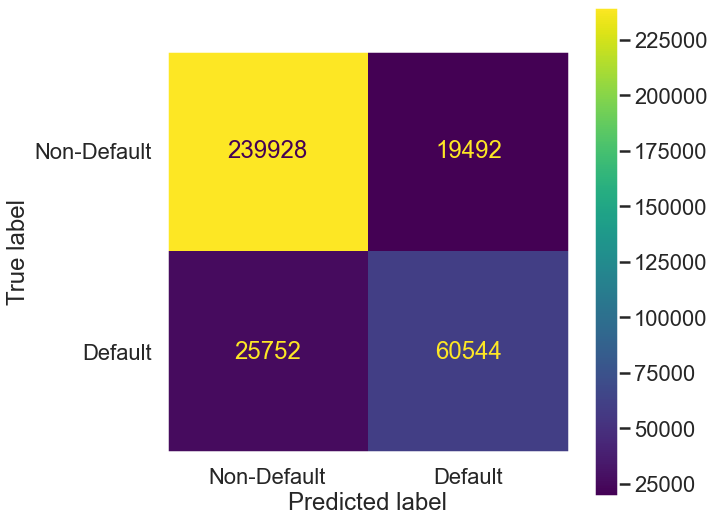

,precision,recall,f1-score,support
Non-Default,0.903,0.925,0.914,"259,420"
Default,0.756,0.702,0.728,"86,296"
accuracy,0.869,0.869,0.869,0
macro avg,0.83,0.813,0.821,"345,716"
weighted avg,0.866,0.869,0.867,"345,716"


In [80]:
#Report log reg
reprot1 = ModelEval(y_test,prediction01,'Non-Default','Default')
reprot1

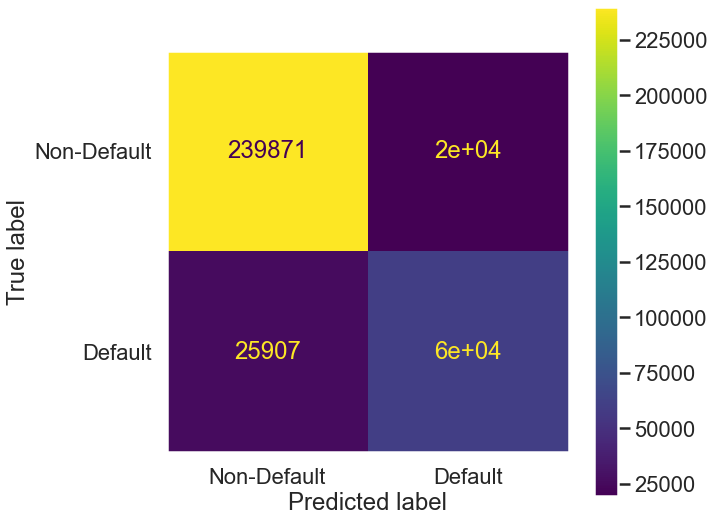

,precision,recall,f1-score,support
Non-Default,0.903,0.925,0.913,"259,420"
Default,0.755,0.7,0.727,"86,296"
accuracy,0.869,0.869,0.869,0
macro avg,0.829,0.812,0.82,"345,716"
weighted avg,0.866,0.869,0.867,"345,716"


In [81]:
#Report log reg low P values
reprot2 = ModelEval(y_test,prediction02,'Non-Default','Default')
reprot2

## c5.0 Model

In [82]:
#Initiate Decision tree
amexmodel=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [83]:
#Fit tree
amexmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [84]:
#Predict 
amexc5predict = amexmodel.predict(X_test)
amexc5predict.shape

(345716,)

In [85]:
y_test.head()

,target
327845,0
1245153,0
1219666,0
379032,0
1311090,0


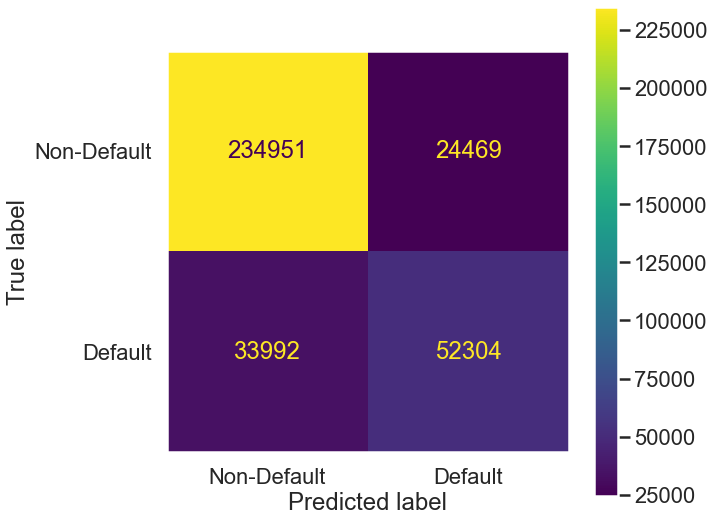

,precision,recall,f1-score,support
Non-Default,0.874,0.906,0.889,"259,420"
Default,0.681,0.606,0.641,"86,296"
accuracy,0.831,0.831,0.831,0
macro avg,0.777,0.756,0.765,"345,716"
weighted avg,0.826,0.831,0.827,"345,716"


In [86]:
#Evaluation for C50
C50Report = ModelEval(y_test,amexc5predict,'Non-Default','Default')
C50Report

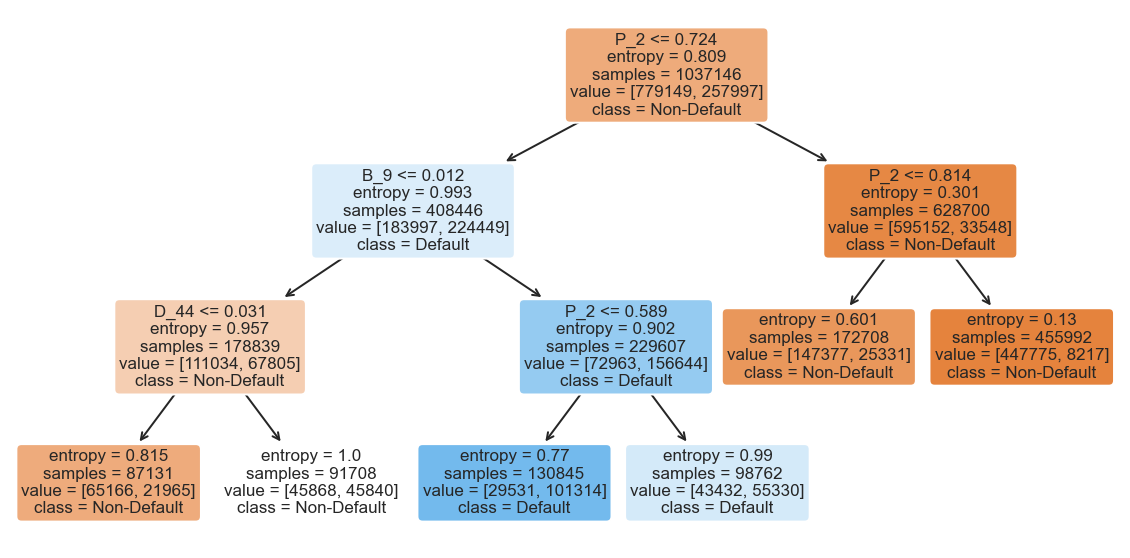

In [87]:
from sklearn.tree import plot_tree

#Figure size
plt.figure(figsize=(20,10))

#Plot tree
plot_tree(amexmodel, feature_names = \
          X_train.columns, class_names = ['Non-Default','Default'], \
          filled=True, rounded = True)

plt.show()

## Cart

In [88]:
#Initiate Decision tree
amexmodelcart=DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=6)

In [89]:
#Fit tree
amexmodelcart.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=6)

In [90]:
#Predict 
amexcartpredict = amexmodelcart.predict(X_test)
amexcartpredict

array([0, 1, 1, ..., 0, 0, 0])

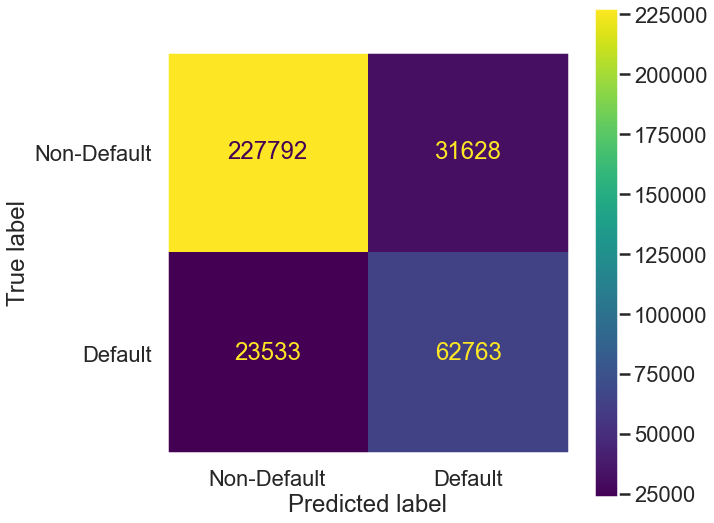

,precision,recall,f1-score,support
Non-Default,0.906,0.878,0.892,"259,420"
Default,0.665,0.727,0.695,"86,296"
accuracy,0.84,0.84,0.84,0
macro avg,0.786,0.803,0.793,"345,716"
weighted avg,0.846,0.84,0.843,"345,716"


In [91]:
#Evaluation CART
CartReport = ModelEval(y_test,amexcartpredict,'Non-Default','Default')
CartReport

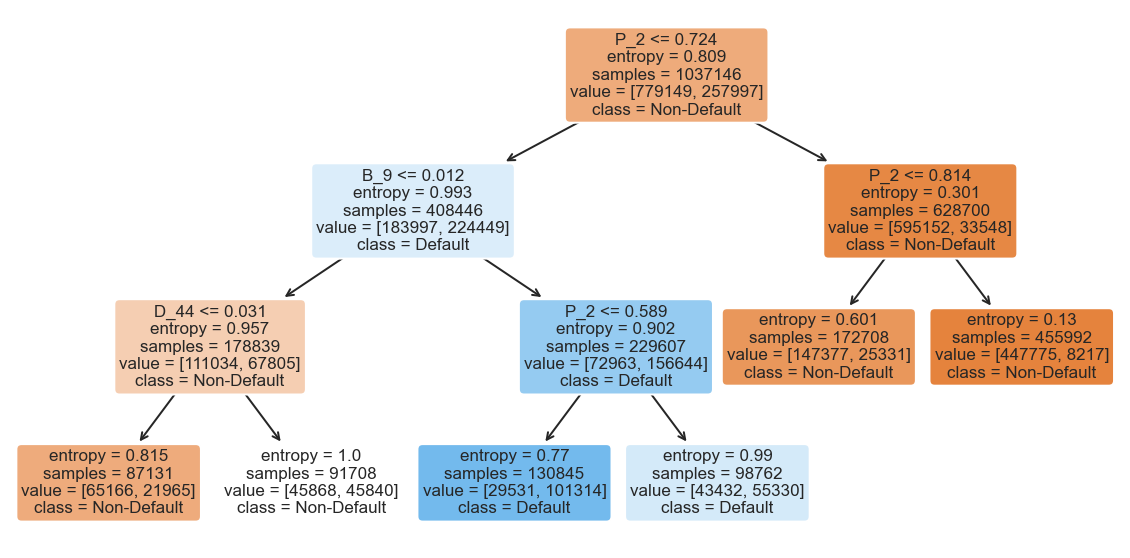

In [92]:
#Figure size
plt.figure(figsize=(20,10))

#Plot tree
#Plot tree
plot_tree(amexmodel, feature_names = \
          X_train.columns, class_names = ['Non-Default','Default'], \
          filled=True, rounded = True)
plt.show()

## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfy = np.ravel(y_train)

In [94]:
#Grow the forest
rf01 = RandomForestClassifier(n_estimators = 20, criterion="gini", max_depth=6)

In [95]:
#Fit forest
rf01.fit(X_train,rfy)

RandomForestClassifier(max_depth=6, n_estimators=20)

In [96]:
#Predict 
rfpredictions = rf01.predict(X_test)
rfpredictions

array([0, 0, 0, ..., 0, 0, 0])

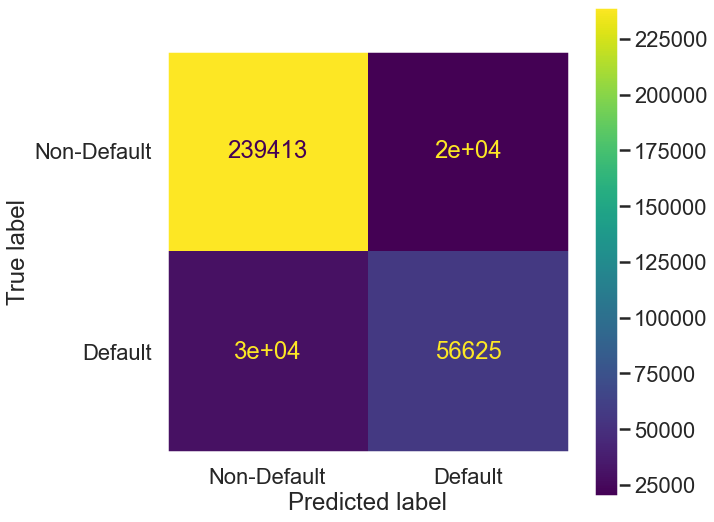

,precision,recall,f1-score,support
Non-Default,0.89,0.923,0.906,"259,420"
Default,0.739,0.656,0.695,"86,296"
accuracy,0.856,0.856,0.856,0
macro avg,0.814,0.79,0.801,"345,716"
weighted avg,0.852,0.856,0.853,"345,716"


In [97]:
#Evaluation Randome Forest
ForestReport = ModelEval(y_test,rfpredictions,'Non-Default','Default')
ForestReport

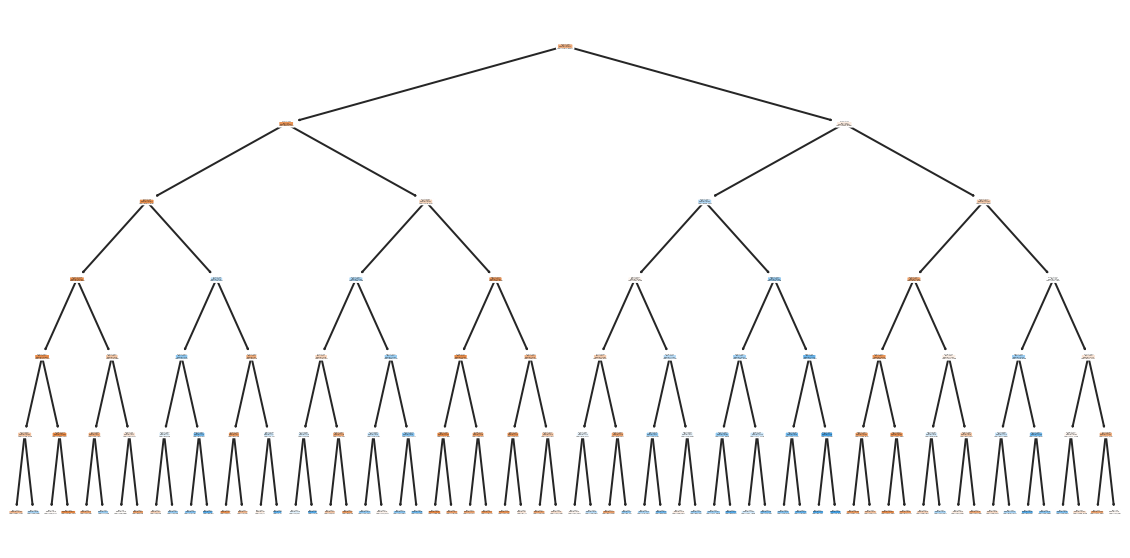

In [98]:
#Figure size
plt.figure(figsize=(20,10))

#Base estimator, single tree from forest
baseTree = rf01.estimators_[0]

#Plot tree
plot_tree(baseTree, \
          filled=True, rounded = True)
plt.show()

## XGBoost

In [99]:
from xgboost import XGBClassifier # XGBoost algorithm

xgb = XGBClassifier(max_depth = 4)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
#xgb_yhat0 = xgb0.predict(X0)
xgb_yhat = xgb.predict(X_test)
xgb_yhat

array([0, 0, 0, ..., 0, 0, 0])

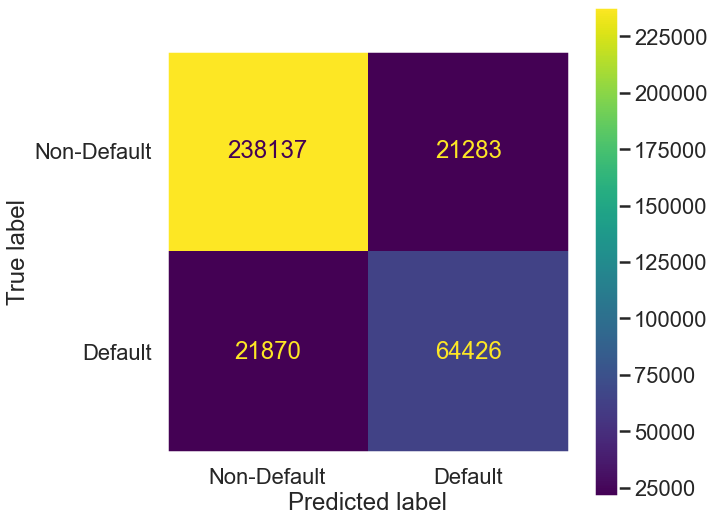

,precision,recall,f1-score,support
Non-Default,0.916,0.918,0.917,"259,420"
Default,0.752,0.747,0.749,"86,296"
accuracy,0.875,0.875,0.875,0
macro avg,0.834,0.832,0.833,"345,716"
weighted avg,0.875,0.875,0.875,"345,716"


In [101]:
#Evaluation XGBoost
XGBoostReport = ModelEval(y_test,xgb_yhat,'Non-Default','Default')
XGBoostReport

## AUC Plot

In [102]:
#set up plotting area

plt.figure(0).clf()

<Figure size 432x288 with 0 Axes>

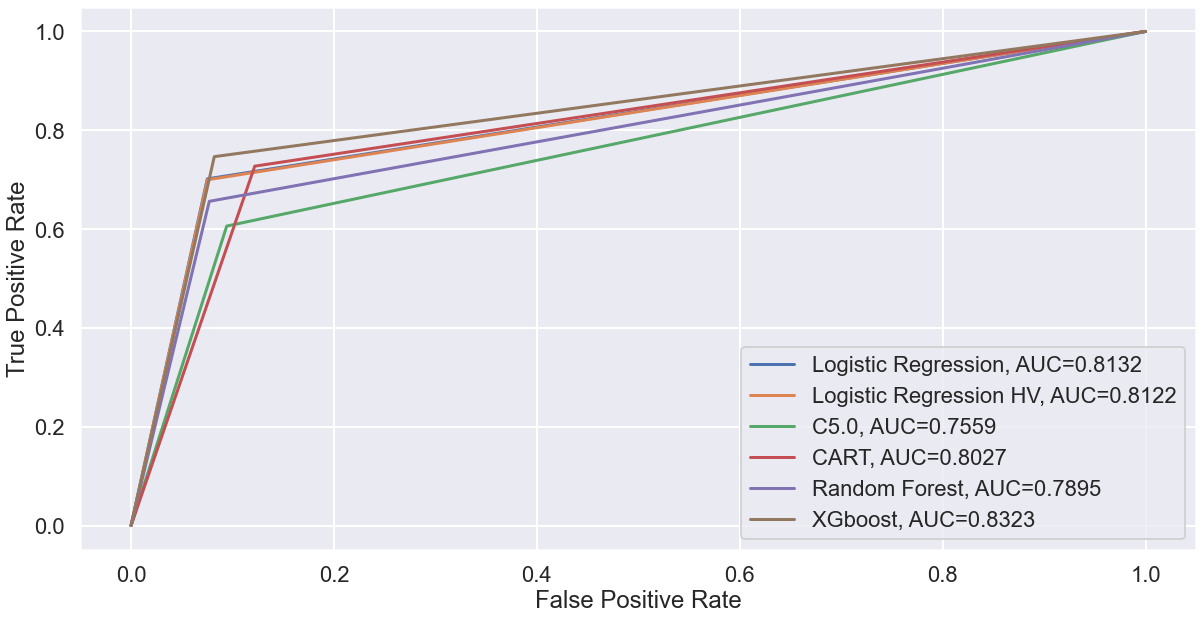

In [103]:
#Figure size
plt.figure(figsize=(20,10))

#Log
fpr, tpr, _ = metrics.roc_curve(y_test, prediction01)
auc = round(metrics.roc_auc_score(y_test, prediction01), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#Log high Variation
fpr, tpr, _ = metrics.roc_curve(y_test, prediction02)
auc = round(metrics.roc_auc_score(y_test, prediction02), 4)
plt.plot(fpr,tpr,label="Logistic Regression HV, AUC="+str(auc))


#C50
fpr, tpr, _ = metrics.roc_curve(y_test, amexc5predict)
auc = round(metrics.roc_auc_score(y_test, amexc5predict), 4)
plt.plot(fpr,tpr,label="C5.0, AUC="+str(auc))

#CART
fpr, tpr, _ = metrics.roc_curve(y_test, amexcartpredict)
auc = round(metrics.roc_auc_score(y_test, amexcartpredict), 4)
plt.plot(fpr,tpr,label="CART, AUC="+str(auc))

#CART
fpr, tpr, _ = metrics.roc_curve(y_test, rfpredictions)
auc = round(metrics.roc_auc_score(y_test, rfpredictions), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#XGBoost
fpr, tpr, _ = metrics.roc_curve(y_test, xgb_yhat)
auc = round(metrics.roc_auc_score(y_test, xgb_yhat), 4)
plt.plot(fpr,tpr,label="XGboost, AUC="+str(auc))


#add legend
plt.legend()

#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()